In [1]:
import sys

In [2]:
def data_v1(n):
    data = []
    for i in range(1, n):
        data.append('#' * i)
    return data

    #return ['#' * i for i in range(1, n)]

In [3]:
data_v1(10)

['#',
 '##',
 '###',
 '####',
 '#####',
 '######',
 '#######',
 '########',
 '#########']

In [4]:
for line in data_v1(10):
    print(line)

#
##
###
####
#####
######
#######
########
#########


In [5]:
sys.getsizeof(data_v1(10))

184

In [6]:
def data_v2(n):
    for i in range(1, n):
        yield '#' * i

    #return ('#' * i for i in range(1, n))

In [7]:
from collections.abc import Iterator
isinstance(data_v2(10), Iterator)

True

In [8]:
generator = data_v2(10)
generator

<generator object data_v2 at 0x000002027883F680>

In [9]:
next(generator)

'#'

In [10]:
for line in data_v2(10):
    print(line)

#
##
###
####
#####
######
#######
########
#########


In [11]:
sys.getsizeof(data_v2(100000))

216

In [12]:
%timeit data_v1(100)

8.27 µs ± 29.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [13]:
%timeit data_v2(100)

220 ns ± 1.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [14]:
%timeit [line for line in data_v1(100)]

10.1 µs ± 34 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [15]:
%timeit [line for line in data_v2(100)]

10.5 µs ± 53.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Rolling Returns

In [16]:
import pandas as pd
import numpy as np
import yfinance as yf

rets = yf.download(tickers='SPY', interval='1mo')["Adj Close"].pct_change().dropna()

def annualize_rets(r, periods_per_year=12):
    compounded_growth = np.exp(np.log1p(r).sum()) # or (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year / n_periods) - 1

[*********************100%***********************]  1 of 1 completed


In [17]:
def periods_loop(r, roll_window=36):
    n_periods = rets.size
    windows = [(start, start + roll_window) for start in range(n_periods - roll_window + 1)]
    return [r.iloc[win[0]:win[1]] for win in windows]

loop_output = periods_loop(rets)
roll_window = 36
# len(loop_output) == rets.size - roll_window
# len(loop_output[0]) == roll_window

In [18]:
rolling_rets = []
for period in periods_loop(rets):
    rolling_rets.append(annualize_rets(period))

rolling_rets = [annualize_rets(period) for period in periods_loop(rets)]

In [19]:
sys.getsizeof(periods_loop(rets))

2872

In [20]:
def periods_generator(r, roll_window=36):
    n_periods = rets.size
    windows = ((start, start + roll_window) for start in range(n_periods - roll_window + 1))
    return (r.iloc[win[0]:win[1]] for win in windows)

generator_output = periods_generator(rets)

In [21]:
next(generator_output)

Date
1993-03-01    0.017593
1993-04-01   -0.020985
1993-05-01    0.026968
1993-06-01   -0.003455
1993-07-01    0.002198
1993-08-01    0.038328
1993-09-01   -0.013422
1993-10-01    0.026082
1993-11-01   -0.010674
1993-12-01    0.005394
1994-01-01    0.041960
1994-02-01   -0.029164
1994-03-01   -0.047396
1994-04-01    0.017045
1994-05-01    0.015939
1994-06-01   -0.029332
1994-07-01    0.039152
1994-08-01    0.038121
1994-09-01   -0.031148
1994-10-01    0.034682
1994-11-01   -0.039816
1994-12-01   -0.000685
1995-01-01    0.041849
1995-02-01    0.040809
1995-03-01    0.022315
1995-04-01    0.035195
1995-05-01    0.039673
1995-06-01    0.014273
1995-07-01    0.038227
1995-08-01    0.004452
1995-09-01    0.036842
1995-10-01    0.002383
1995-11-01    0.044480
1995-12-01    0.009492
1996-01-01    0.041981
1996-02-01    0.003190
Name: Adj Close, dtype: float64

In [22]:
sys.getsizeof(periods_generator(rets))

232

In [23]:
rolling_rets = []
for period in periods_loop(rets):
    rolling_rets.append(annualize_rets(period))

rolling_rets = [annualize_rets(period) for period in periods_generator(rets)]

<Axes: title={'center': 'SPY - 36 Month Rolling Returns'}, xlabel='Date'>

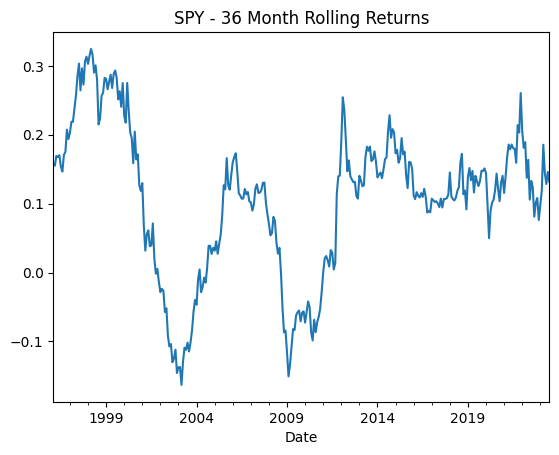

In [24]:
import matplotlib.pyplot as plt
roll_window = 36
rolling_rets = [annualize_rets(period) for period in periods_generator(rets)]
pd.Series(rolling_rets, index=rets.iloc[roll_window - 1:].index, name='SPY').plot(title='SPY - 36 Month Rolling Returns')

## Appendix

In [25]:
def function():
    # i loops from 1 to 9
    for i in range(1, 10):
        return i

In [26]:
function() # it is returned as a 1 during the first iteration

1

In [27]:
function() # the state of 'i' does NOT persist between function calls

1

In [28]:
print(i) # NOT available outside the function

NameError: name 'i' is not defined

<Axes: title={'center': 'Memory Usage for Different Inputs'}, xlabel='Input Value', ylabel='Memory Usage (bytes)'>

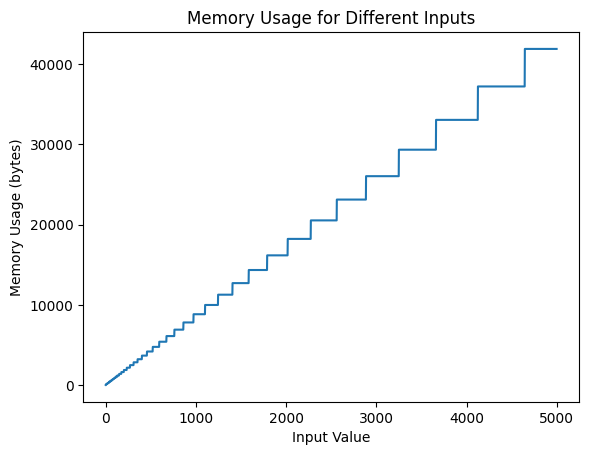

In [29]:
pd.Series([sys.getsizeof(data_v1(input)) for input in range(1, 5000)]).plot(
    title='Memory Usage for Different Inputs',
    xlabel='Input Value', ylabel='Memory Usage (bytes)'
)